In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from mpl_toolkits import mplot3d

**Task 1**

**Task 3**

In [28]:
def gumble_copula_pdf(u, v, theta):
    log_u = -np.log(u)
    log_v = -np.log(v)
    
    sum_logs_theta = log_u**theta + log_v**theta
    A = sum_logs_theta**(1/theta)

    term1 = np.exp(-A) / (u * v)
    term2 = log_u**(theta - 1) * log_v**(theta - 1)
    term3 = (sum_logs_theta)**(2 - 2/theta)
    term4 = (1 + (theta - 1) * A / sum_logs_theta)

    return term1 * term2 * term3 * term4

In [29]:
def compute_joint_pdf(x, y, theta):
    X, Y = np.meshgrid(x, y)
    u = stats.norm.cdf(X)
    v = stats.norm.cdf(Y)
    pdf_X = stats.norm.pdf(X)
    pdf_Y = stats.norm.pdf(Y)

    copula_density = gumble_copula_pdf(u, v, theta)
    joint_density = copula_density * pdf_X * pdf_Y
    return X, Y, joint_density

In [66]:
def plot_joint_pdf(X, Y, Z, theta):
    fig = plt.figure(figsize=(6, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z,
                    cmap='plasma',
                    edgecolor='k',
                    linewidth=0.2,
                    alpha=0.7,
                    antialiased=True)
    ax.set_title(f'Joint PDF with Gumbel Copula (θ = {theta})')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('density')
    plt.show()

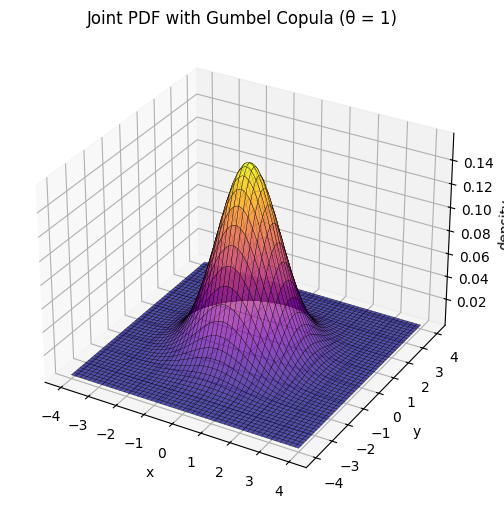

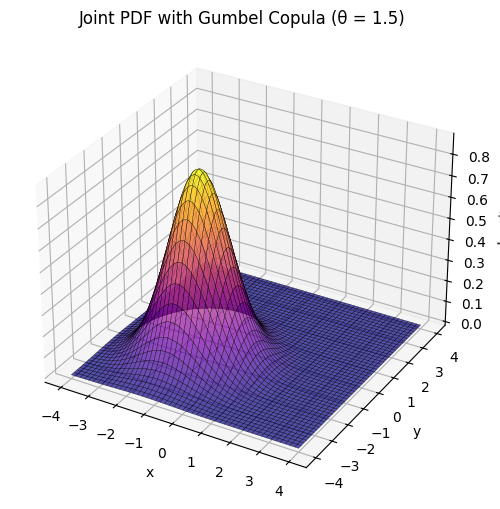

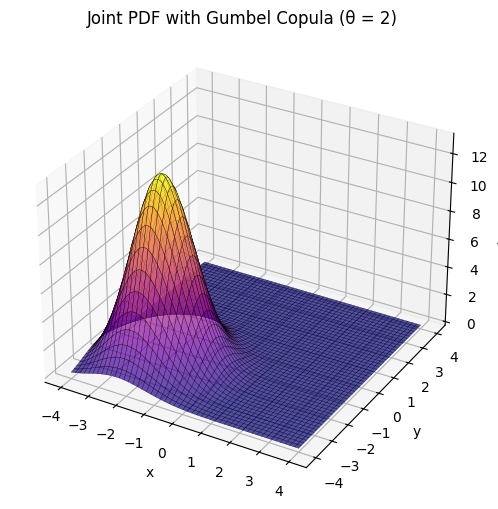

In [67]:
x = np.linspace(-4, 4, 300)
y = np.linspace(-4, 4, 300)
thetas = [1, 1.5, 2]

for theta in thetas:
    X, Y, joint_pdf = compute_joint_pdf(x, y, theta)
    plot_joint_pdf(X, Y, joint_pdf, theta)

**Task 4**

In [76]:
data = np.loadtxt('dat.txt')
x1_samples = data[:, 0]
x2_samples = data[:, 1]

In [77]:
def empirical_cdf(sample, x_vals):
    N = len(sample)
    return np.array([np.sum(sample <= x) / N for x in x_vals])

In [78]:
x_plot = np.linspace(-2, 2, 500)

# Compute empirical CDFs
cdf_x1 = empirical_cdf(x1_samples, x_plot)
cdf_x2 = empirical_cdf(x2_samples, x_plot)

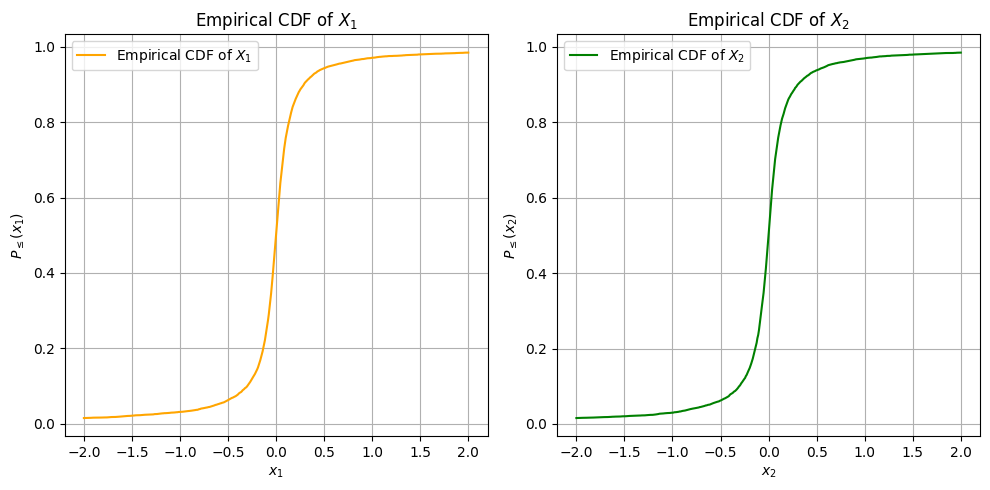

In [95]:
plt.figure(figsize=(10, 5))

# CDF of X1
plt.subplot(1, 2, 1)
plt.plot(x_plot, cdf_x1, label='Empirical CDF of $X_1$', color='orange')
plt.xlabel('$x_1$')
plt.ylabel('$P_{\\leq}(x_1)$')
plt.title('Empirical CDF of $X_1$')
plt.grid(True)
plt.legend()

# CDF of X2
plt.subplot(1, 2, 2)
plt.plot(x_plot, cdf_x2, label='Empirical CDF of $X_2$', color='green')
plt.xlabel('$x_2$')
plt.ylabel('$P_{\\leq}(x_2)$')
plt.title('Empirical CDF of $X_2$')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [80]:
N = len(x1_samples)

In [87]:
def compute_uniform(sample):
    ranks = np.argsort(np.argsort(sample))
    return (ranks + 1) / (len(sample) + 1)


In [88]:
u1 = compute_uniform(x1_samples)
u2 = compute_uniform(x2_samples)

In [89]:
z1 = stats.norm.ppf(u1)
z2 = stats.norm.ppf(u2)

In [97]:
rho = np.corrcoef(z1, z2)[0, 1]
print('Estimation of the correlation coefficient ρ')
print(f'{rho:.5f}')

Estimation of the correlation coefficient ρ
-0.59236
